<a href="https://colab.research.google.com/github/JOEL7DAVID/Programacion/blob/main/Lab_2023_1005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://www.udistrital.edu.co/themes/custom/versh/logo.png">

# **Facultad de Ingeniería - Ingeniería Electrónica**

# **Programación Aplicada**
## **Docente:**
### Gerardo Alcides Muñoz Quiñones.

## **Integrantes:**
### Julian David Ramirez Bocanegra - 20221005104
### Joel David Buitrago Sanchez - 20212005086
### Camilo Felipe Albadan Daza - 20211005102

#**1. Consultar como medir el tiempo que dura una función en Python.**



Para medir el tiempo que tarda una función en Python, puedes usar el módulo **time**, en Python es una parte estándar de la biblioteca estándar que proporciona funciones para trabajar con medidas de tiempo y reloj. Se Puede utilizarlo para medir el tiempo transcurrido, crear retrasos en los programas, medir el tiempo que dura una función, obtener información sobre la hora actual, y mucho más. A continuación un ejemplo de un codigo empleando **time**:

In [ ]:
import time

def mi_funcion():

    for _ in range(1000000):
        pass

inicio = time.time() # Registra el tiempo de inicio

mi_funcion()

fin = time.time() # Registra el tiempo de finalización
tiempo_transcurrido = fin - inicio # Calcula el tiempo transcurrido

print(f"La función tomó {tiempo_transcurrido} segundos en ejecutarse.")


La función tomó 0.03389787673950195 segundos en ejecutarse.


Sin embargo, hay otro módulo empleado para medir el tiempo que dura una función en Python, ese es el **timeit**, este es especialmente útil cuando se necesita medir tiempos muy cortos con alta precisión y quieres obtener estadísticas más confiables sobre el rendimiento de una función. El módulo timeit proporciona una forma conveniente de realizar múltiples ejecuciones y calcular automáticamente el tiempo promedio. A continuación, un ejemplo de un código empleando **timeit**:

In [ ]:
import timeit

# Definir la función a medir
def suma_naturales(n):
    suma = 0
    for i in range(1, n + 1):
        suma += i
    return suma


timer = timeit.Timer(lambda: suma_naturales(10000)) # Crear un objeto Timer con la función y un valor de n


tiempo_ejecucion = timer.timeit(number=1) # Medir el tiempo de ejecución en una sola ejecución

print(f"Tiempo de ejecución para sumar los primeros 10,000 números naturales: {tiempo_ejecucion} segundos")


Tiempo de ejecución para sumar los primeros 10,000 números naturales: 0.0013538880000396603 segundos


# **2. Desarrollar en Mycropython una rutina llamada elem que devuelve un elemento i,j de una "matriz" definida con array.**

In [ ]:
# Primero se realizo el codigo en python para analizar su funcionamiento y llevarlo a Micropython:
import array
M=array.array('f', [2,1, 4, 5, 6,3,9])
M

array('f', [2.0, 1.0, 4.0, 5.0, 6.0, 3.0, 9.0])

In [ ]:
def elem(M, fila, columna):
    # Extraemos el número de columnas de la matriz.
    num_columnas = int(M[0])

    # Verificamos si los índices están dentro de los límites de la matriz.
    if fila >= num_columnas or columna >= num_columnas:
        raise IndexError("Índice fuera de rango")

    # Calculamos la posición del elemento deseado en la lista y lo devolvemos.
    posicion = 1 + fila * num_columnas + columna
    return M[posicion]

# Ejemplo de uso:
# Creamos una lista 'M' con dos columnas y datos.
M = [2.0, 1.0, 4.0, 5.0, 6.0, 3.0, 9.0]

# Accedemos al elemento en la fila 1 (fila=0) y columna 2 (columna=1).
elemento = elem(M, 0, 1)


print(elemento)  # Esto imprimirá 4.0 en este ejemplo correspondiente al elemento en la fila 0, columna 1 de la matriz

4.0


# **3. Mida el tiempo utiliza de la función elem para matrices cuadradas de 10x10, 20x20, ..., 100x100 en el pc y en la raspberry pico y grafique ambas soluciones.**



In [ ]:
import random
from array import array
import timeit

def crear_matriz(filas, columnas):
    matriz = []
    for _ in range(filas):
        fila = array('f', [random.uniform(0,1) for _ in range(columnas)])
        matriz.append(fila)
    return matriz

def elem(M, fila, columna):
    # Verificamos si los índices están dentro de los límites de la matriz.
    if fila >= len(M) or columna >= len(M[0]):
        raise IndexError("Índice fuera de rango")

    # Accedemos al elemento deseado en la matriz y lo devolvemos.
    return M[fila][columna]

# Ejemplo de uso:
filas = 1000
columnas = 1000
matriz = crear_matriz(filas, columnas)

# Función para medir el tiempo de ejecución de elem
"""def medir_tiempo():
    elemento = elem(matriz, 0, 1)
print( elemento)
# Medir el tiempo """
tiempo = timeit.timeit(medir_tiempo, number=1000)  # Número de veces que se ejecutará la función

print(f"Tiempo de ejecución: {tiempo} segundos")

Tiempo de ejecución: 0.0007084759999997914 segundos


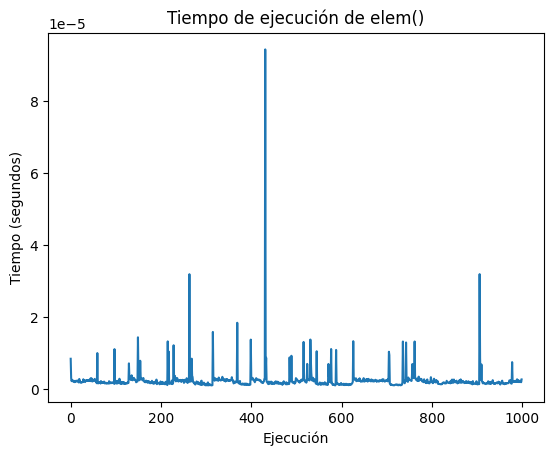

In [ ]:

import matplotlib.pyplot as plt


plt.plot(resultados)
plt.xlabel('Ejecución')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo de ejecución de elem()')
plt.show()


In [ ]:
import utime
import array
import random

def create_random_matrix(rows, cols):
    start_time = utime.ticks_us()  # Registra el tiempo de inicio en microsegundos

    # Crea una matriz de enteros de 32 bits con valores aleatorios entre 0 y 99
    matrix = array.array('l', [random.randint(0, 99) for _ in range(rows * cols)])

    end_time = utime.ticks_us()  # Registra el tiempo de finalización en microsegundos
    creation_time = utime.ticks_diff(end_time, start_time)  # Calcula el tiempo de creación en microsegundos

    return matrix, rows, cols, creation_time

def elem(matrix, rows, cols, row, col):
    start_time = utime.ticks_us()  # Registra el tiempo de inicio en microsegundos

    element = matrix[row * cols + col]

    end_time = utime.ticks_us()  # Registra el tiempo de finalización en microsegundos
    access_time = utime.ticks_diff(end_time, start_time)  # Calcula el tiempo de acceso en microsegundos

    return element, access_time

# Ejemplo de uso
rows = 4
cols = 4
result_matrix, num_rows, num_cols, creation_time = create_random_matrix(rows, cols)

print("Matriz generada:")
for i in range(num_rows):
    row = result_matrix[i * num_cols: (i + 1) * num_cols]
    print(row)

element, access_time = elem(result_matrix, num_rows, num_cols, 0, 2)
print("Elemento en la posición:", element)
print("Tiempo de acceso al elemento:", access_time, "microsegundos")
print("Tiempo de creación de la matriz:", creation_time, "microsegundos")
